# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

MAIN_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(MAIN_DIR, 'data')

TRAIN_DATA_NAME = 'UNSW_NB15_training-set.csv'
TEST_DATA_NAME = 'UNSW_NB15_testing-set.csv'

TRAIN_DIR = os.path.join(DATA_DIR, TRAIN_DATA_NAME)
TEST_DIR = os.path.join(DATA_DIR, TEST_DATA_NAME)

## Read Data

In [2]:
df_train = pd.read_csv(TRAIN_DIR)

df_train.shape

(82332, 45)

In [3]:
print(df_train.columns.values)
df_train.head()

['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
df_train.isna().sum().sum()

np.int64(0)

# Split data

In [5]:
df_train.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0


In [6]:
df_train.groupby('attack_cat').size().sort_values(ascending=False)

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
dtype: int64

In [7]:
fltr = df_train['attack_cat'] != 'Normal'
gr = pd.DataFrame(df_train[fltr].groupby('attack_cat').size(), columns=['count']).reset_index()
gr["pct"] = gr["count"] / gr["count"].sum() * 100
gr = gr.sort_values(by='count', ascending=False)

In [8]:
X = df_train.drop(columns=["attack_cat","label"])
y = df_train["attack_cat"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
info_target_train = pd.DataFrame(y_train.value_counts(), columns=['count']).reset_index()
info_target_train["pct"] = info_target_train["count"] / info_target_train["count"].sum() * 100
info_target_train

,attack_cat,count,pct
0,Normal,29600,44.940408
1,Generic,15097,22.921127
2,Exploits,8905,13.520079
3,Fuzzers,4850,7.363547
4,DoS,3271,4.966219
5,Reconnaissance,2797,4.246565
6,Analysis,542,0.822895
7,Backdoor,466,0.707508
8,Shellcode,302,0.458514
9,Worms,35,0.053139


In [10]:
info_target_train = pd.DataFrame(y_test.value_counts(), columns=['count']).reset_index()
info_target_train["pct"] = info_target_train["count"] / info_target_train["count"].sum() * 100
info_target_train

,attack_cat,count,pct
0,Normal,7400,44.938362
1,Generic,3774,22.918564
2,Exploits,2227,13.524018
3,Fuzzers,1212,7.360175
4,DoS,818,4.967511
5,Reconnaissance,699,4.244853
6,Analysis,135,0.819821
7,Backdoor,117,0.710512
8,Shellcode,76,0.461529
9,Worms,9,0.054655


## Clean Data

In [11]:
df_train_cleaned = X_train.dropna(axis=0, how='any')
df_test_cleaned = X_test.dropna(axis=0, how='any')

cols_drop = ['id']
df_train_cleaned = df_train_cleaned.drop(columns=cols_drop)
df_test_cleaned = df_test_cleaned.drop(columns=cols_drop)

In [12]:
df_numeric_train = df_train_cleaned.select_dtypes(include=[np.number])
df_numeric_train.describe(include='all')

df_numeric_test = df_test_cleaned.select_dtypes(include=[np.number])

In [13]:
fltr = df_numeric_train == 0
df_numeric_train = df_numeric_train.astype(float)
df_numeric_train[fltr] = df_numeric_train[fltr] + 1e-9
df_numeric_train = df_numeric_train.map(lambda x: np.log(x))
df_numeric_train

fltr = df_numeric_test == 0
df_numeric_test = df_numeric_test.astype(float)
df_numeric_test[fltr] = df_numeric_test[fltr] + 1e-9
df_numeric_test = df_numeric_test.map(lambda x: np.log(x))
df_numeric_test

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
18232,-12.206073,0.693147,-20.723266,4.736198,-20.723266,12.206073,5.537334,-20.723266,18.328565,-20.723266,...,3.218876,3.218876,3.218876,3.401197,-20.723266,-20.723266,-20.723266,3.258097,3.401197,-20.723266
81663,-2.010386,1.791759,0.693147,6.905753,4.454347,3.956296,4.127134,5.529429,10.813660,7.851027,...,1.098612,1.098612,0.000000,1.609438,-20.723266,-20.723266,-20.723266,1.098612,1.609438,-20.723266
53401,-0.404083,2.302585,2.079442,6.331502,5.869297,3.237296,5.537334,5.529429,8.710061,8.220096,...,0.693147,0.000000,0.000000,0.693147,-20.723266,-20.723266,-20.723266,2.197225,1.386294,-20.723266
34648,-4.093845,3.828641,3.871201,7.956477,10.329474,8.626444,3.433987,3.367296,14.107800,16.481739,...,1.791759,0.000000,0.000000,0.000000,-20.723266,-20.723266,-20.723266,0.693147,2.079442,-20.723266
1201,0.259202,2.484907,2.302585,6.905753,6.716595,2.785321,5.537334,5.529429,8.639164,8.432281,...,0.000000,0.000000,0.000000,0.000000,-20.723266,-20.723266,-20.723266,0.000000,0.000000,-20.723266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.339873,3.784190,3.178054,10.522073,7.539027,3.864820,4.127134,5.529429,12.238673,9.236221,...,0.000000,0.000000,0.000000,0.000000,-20.723266,-20.723266,-20.723266,0.693147,0.693147,-20.723266
79401,0.964027,4.094345,2.890372,11.130156,6.664409,3.379778,5.537334,5.529429,12.228772,7.723415,...,0.000000,0.000000,0.000000,0.000000,-20.723266,-20.723266,-20.723266,0.000000,0.000000,-20.723266
18613,-12.716898,0.693147,-20.723266,4.736198,-20.723266,12.716898,5.537334,-20.723266,18.839391,-20.723266,...,3.178054,3.178054,3.178054,3.496508,-20.723266,-20.723266,-20.723266,3.218876,3.496508,-20.723266
66210,2.504457,1.791759,-20.723266,5.598422,-20.723266,-0.895019,5.537334,-20.723266,4.991085,-20.723266,...,3.091042,0.693147,0.693147,3.871201,-20.723266,-20.723266,-20.723266,3.135494,3.871201,-20.723266


In [14]:
scaler = StandardScaler()
scaler.fit(df_numeric_train)
df_numeric_scaled_train = scaler.transform(df_numeric_train)
df_numeric_scaled_train = pd.DataFrame(df_numeric_scaled_train, columns=df_numeric_train.columns)

scaler = StandardScaler()
scaler.fit(df_numeric_test)
df_numeric_scaled_test = scaler.transform(df_numeric_test)
df_numeric_scaled_test = pd.DataFrame(df_numeric_scaled_test, columns=df_numeric_test.columns)

### Categorigal transformation

reduce categories dimensionality, select top K categories

In [15]:
class CardinalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=5, placeholder='otros'):
        self.top_n = top_n
        self.placeholder = placeholder
        self.top_categories_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in X.select_dtypes(include='object'):
            self.top_categories_[col] = X[col].value_counts().nlargest(self.top_n).index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        for col, top_vals in self.top_categories_.items():
            X[col] = X[col].where(X[col].isin(top_vals), self.placeholder)
        return X
    
cardinality_reducer = CardinalityReducer(top_n=5, placeholder='otros')

In [16]:
df_categorical_train = df_train_cleaned.select_dtypes(exclude=[np.number])
df_categorical_train

cardinality_reducer.fit(df_categorical_train)
df_categorical_reduced_train = cardinality_reducer.transform(df_categorical_train)
df_categorical_reduced_train.nunique()

df_categorical_test = df_test_cleaned.select_dtypes(exclude=[np.number])
df_categorical_reduced_test = cardinality_reducer.transform(df_categorical_test)

In [17]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(df_categorical_reduced_train)
df_categorical_encoded_train = enc.transform(df_categorical_reduced_train)
df_categorical_encoded_train = pd.DataFrame(df_categorical_encoded_train, columns=enc.get_feature_names_out())

df_categorical_encoded_test = enc.transform(df_categorical_reduced_test)
df_categorical_encoded_test = pd.DataFrame(df_categorical_encoded_test, columns=enc.get_feature_names_out())

In [18]:
train_df = pd.concat([df_numeric_scaled_train, df_categorical_encoded_train], axis=1)

test_df = pd.concat([df_numeric_scaled_test, df_categorical_encoded_test], axis=1)

train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_http,service_otros,service_smtp,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_otros
0,-1.180012,-0.898921,-1.130160,-0.626444,-1.126885,1.070094,0.314302,-1.129229,1.060387,-1.122030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.745400,0.396555,0.823924,0.329244,0.767913,-0.573770,0.314302,0.945046,-0.517224,0.787390,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.016331,1.031204,0.897461,0.607069,0.902114,-0.714275,-0.383295,0.774212,-0.702910,0.813069,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.137694,1.838787,0.951188,2.883650,0.914348,-0.678318,-0.153405,0.945046,-0.176474,0.781155,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.180012,-0.898921,-1.130160,-1.120237,-1.126885,1.070094,0.314302,-1.129229,0.920633,-1.122030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65860,0.978345,0.396555,0.848892,0.235454,0.867869,-0.812087,-0.153405,0.945046,-0.779847,0.792870,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65861,0.976910,0.396555,0.868259,0.061123,0.831265,-0.788805,0.314302,0.945046,-0.827620,0.762667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65862,0.933685,0.396555,0.823924,-0.072308,0.767913,-0.786102,0.314302,0.945046,-0.821838,0.717498,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65863,0.806331,0.396555,0.823924,0.240040,0.767913,-0.642483,0.314302,0.945046,-0.604334,0.764772,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modelos

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

### Logistic Regression

In [20]:
logi_adj = LogisticRegression(random_state=42, max_iter=10000, penalty=None, solver="lbfgs",multi_class='multinomial')
logi_adj.fit(train_df, y_train)
y_pred = logi_adj.predict(test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# dict_accuracy_models["reg_log_ajustado"] = accuracy
print(f'Accuracy: {accuracy:.4f}')

#calculo Precision usado=1
prec = precision_score(y_test, y_pred, average='macro')
# dict_precision_models["reg_log_ajustado"] = prec

#calculo Recall nuevo = 1
rec = recall_score(y_test, y_pred, average='macro')
# dict_recall_models["reg_log_ajustado"] = rec

#calculo F1-Score
f1 = f1_score(y_test, y_pred, average='macro')

model_performance.loc['Logistic Regression'] = [accuracy,
                                                rec,
                                                prec,
                                                f1]

c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8379


,attack_cat,count,pct
5,Generic,18871,41.628430
3,Exploits,11132,24.556605
4,Fuzzers,6062,13.372452
2,DoS,4089,9.020118
6,Reconnaissance,3496,7.711992
0,Analysis,677,1.493426
1,Backdoor,583,1.286067
7,Shellcode,378,0.833848
8,Worms,44,0.097062


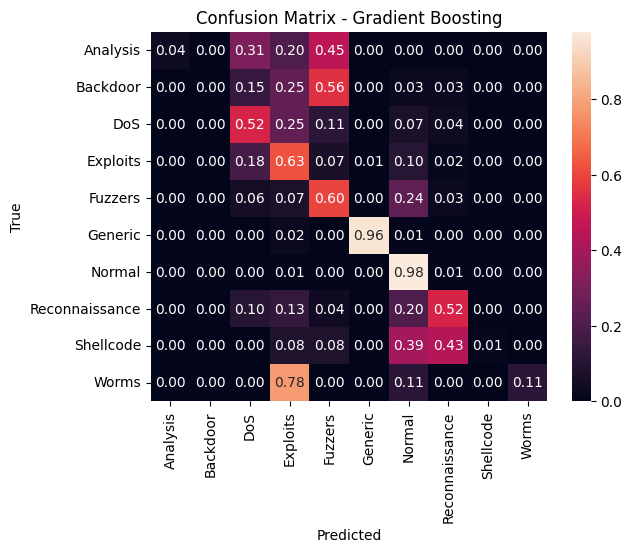

In [21]:
display(gr)
cm = confusion_matrix(y_test, y_pred, labels=logi_adj.classes_, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=logi_adj.classes_, yticklabels=logi_adj.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Analysis       0.56      0.04      0.07       135
      Backdoor       0.00      0.00      0.00       117
           DoS       0.42      0.52      0.46       818
      Exploits       0.70      0.63      0.66      2227
       Fuzzers       0.62      0.60      0.61      1212
       Generic       0.99      0.96      0.98      3774
        Normal       0.90      0.98      0.94      7400
Reconnaissance       0.63      0.52      0.57       699
     Shellcode       0.33      0.01      0.03        76
         Worms       0.50      0.11      0.18         9

      accuracy                           0.84     16467
     macro avg       0.57      0.44      0.45     16467
  weighted avg       0.83      0.84      0.83     16467



In [23]:
pd.DataFrame(logi_adj.coef_.T, index=logi_adj.feature_names_in_, columns=logi_adj.classes_)

,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
dur,-0.683087,-0.825872,-0.336178,-0.746245,-0.670526,-1.049071,-1.774224,-0.008784,2.340887,3.753100
spkts,0.145907,2.376519,5.187417,21.546685,14.979910,-3.629703,8.093202,-46.140710,-0.884993,-1.674235
dpkts,-20.638475,-2.256045,-23.745986,-35.596440,-22.683831,-0.661485,55.878445,52.824367,-9.856908,6.736359
sbytes,0.159546,-2.463579,-5.625798,-26.397388,-15.003255,3.860839,-7.433268,59.311871,-6.197109,-0.211859
dbytes,-5.113991,-6.426152,46.910958,50.402379,10.062673,20.143236,-64.804378,-26.800665,-29.208152,4.834093
rate,-7.766795,2.943139,-3.504355,0.122798,7.677318,1.987015,-6.741020,8.111213,-10.964697,8.135384
sttl,-17.710113,-5.796267,-5.864893,-6.145288,9.775576,-4.075427,-3.692820,1.943235,12.622153,18.943846
dttl,3.390044,4.049799,22.086361,37.191339,-6.491514,-21.406077,-85.661770,33.212259,17.372260,-3.742702
sload,16.805937,-4.821143,1.572921,-2.093585,-9.512492,-3.869125,5.027773,-9.470118,13.744579,-7.384747
dload,15.256887,12.756360,-4.027966,-3.582059,-10.891778,-5.290133,-10.450051,-3.005878,9.366973,-0.132355


### Gradient Boosting

In [24]:
xgb = GradientBoostingClassifier()
xgb.fit(train_df, y_train)

y_pred = xgb.predict(test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# dict_accuracy_models["reg_log_ajustado"] = accuracy
print(f'Accuracy: {accuracy:.4f}')

#calculo Precision usado=1
prec = precision_score(y_test, y_pred, average='macro')
# dict_precision_models["reg_log_ajustado"] = prec

#calculo Recall nuevo = 1
rec = recall_score(y_test, y_pred, average='macro')
# dict_recall_models["reg_log_ajustado"] = rec

#calculo F1-Score
f1 = f1_score(y_test, y_pred, average='macro')

model_performance.loc['XGBoost'] = [accuracy,
                                    rec,
                                    prec,
                                    f1]

Accuracy: 0.8150


c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [25]:
print(classification_report(y_test, y_pred))

c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       135
      Backdoor       0.00      0.00      0.00       117
           DoS       0.44      0.55      0.49       818
      Exploits       0.54      0.32      0.40      2227
       Fuzzers       0.71      0.60      0.65      1212
       Generic       0.99      0.97      0.98      3774
        Normal       0.83      0.99      0.90      7400
Reconnaissance       0.87      0.75      0.81       699
     Shellcode       0.64      0.54      0.59        76
         Worms       0.56      0.56      0.56         9

      accuracy                           0.81     16467
     macro avg       0.56      0.53      0.54     16467
  weighted avg       0.79      0.81      0.80     16467



c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,attack_cat,count,pct
5,Generic,18871,41.628430
3,Exploits,11132,24.556605
4,Fuzzers,6062,13.372452
2,DoS,4089,9.020118
6,Reconnaissance,3496,7.711992
0,Analysis,677,1.493426
1,Backdoor,583,1.286067
7,Shellcode,378,0.833848
8,Worms,44,0.097062


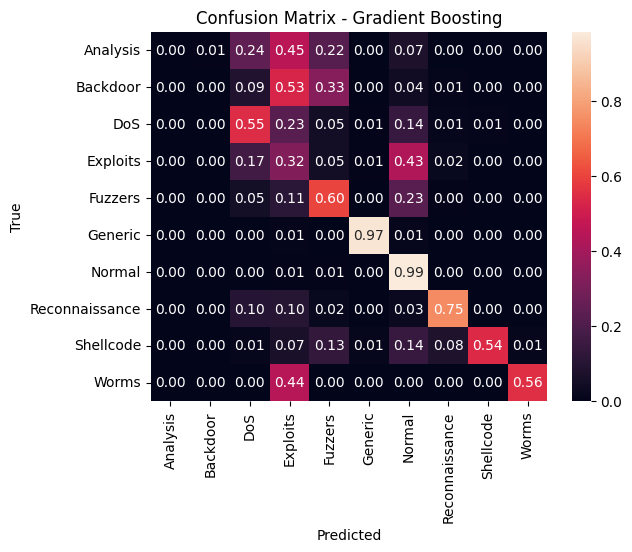

In [26]:
display(gr)
cm = confusion_matrix(y_test, y_pred, labels=logi_adj.classes_, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=logi_adj.classes_, yticklabels=logi_adj.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [27]:
feature_importances = xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_df.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
46,service_dns,0.286436
6,sttl,0.185211
3,sbytes,0.113643
37,ct_srv_dst,0.061112
32,ct_dst_src_ltm,0.058722
23,smean,0.040268
21,synack,0.029973
4,dbytes,0.027126
20,tcprtt,0.026926
41,proto_otros,0.025636


In [28]:
model_performance

,Accuracy,Recall,Precision,F1-Score
Logistic Regression,0.837858,0.437458,0.565531,0.450084
XGBoost,0.814963,0.527570,0.559507,0.538217
